In [5]:
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
%matplotlib inline
plt.rc('text',usetex=True)
plt.rc('lines',linewidth=1)
plt.rc('legend',fontsize=10)
plt.rc('mathtext',fontset='cm')
plt.rc('font',**{'family':'serif','serif':['Helvetica'],'size':14})
sns.set(style="ticks")


In [6]:
import copy
rawdat=json.load(open("tm_molecules.json"))
df={'tm':[],
    'ligand':[],
    'timestep':[],
    'method':[],
    'bond length':[],
    'hybrid':[],
    'sz':[],
    'jastrow':[],
    'optimizer':[],
    'energy':[],
    'error':[],
    'dft_energy':[],
    'vmc_energy':[],
    'vmc_energy_err':[]
    }


for d in rawdat:
  spl=d['xyz'].split()
  tm=spl[1]
  ligand=spl[5]
  bond_length=float(spl[8])
  hyb=d['dft']['functional']['hybrid']
  sz=d['total_spin']
  dften=0.0
  if 'total_energy' in d['dft']:
    dften=d['dft']['total_energy']
  vmc=d['qmc']['energy_optimize']
  if 'results' in d['qmc']['dmc']:
    for res in d['qmc']['dmc']['results']:
      df['tm'].append(tm)
      df['ligand'].append(ligand)
      df['bond length'].append(bond_length)
      df['hybrid'].append(hyb)
      df['sz'].append(sz)
      df['dft_energy'].append(dften)
      df['jastrow'].append(res['jastrow'])
      df['optimizer'].append(res['optimizer'])
      df['timestep'].append(res['timestep'])
      df['method'].append("dmc")
      df['energy'].append(res['results']['properties']['total_energy']['value'][0])
      df['error'].append(res['results']['properties']['total_energy']['error'][0])
      df['vmc_energy'].append(vmc[res['jastrow']]['energy'][-1])
      df['vmc_energy_err'].append(vmc[res['jastrow']]['energy_err'][-1])

      

for k in df.keys():
  print(k,len(df[k]))
df=pd.DataFrame(df)
df

method 1136
bond length 1136
vmc_energy_err 1136
vmc_energy 1136
ligand 1136
error 1136
timestep 1136
dft_energy 1136
sz 1136
hybrid 1136
optimizer 1136
energy 1136
jastrow 1136
tm 1136


,bond length,dft_energy,energy,error,hybrid,jastrow,ligand,method,optimizer,sz,timestep,tm,vmc_energy,vmc_energy_err
0,1.55,-68.121116,-68.103334,0.001057,15,twobody,N,dmc,variance,1,0.005,Ti,-68.005420,0.001699
1,1.55,-68.121116,-68.107898,0.000908,15,twobody,N,dmc,energy,1,0.005,Ti,-68.005420,0.001699
2,1.55,-68.121116,-68.105487,0.000970,15,threebody,N,dmc,variance,1,0.005,Ti,-68.037615,0.000318
3,1.55,-68.121116,-68.113308,0.000797,15,threebody,N,dmc,energy,1,0.005,Ti,-68.037615,0.000318
4,1.55,-68.121116,-68.101715,0.000941,15,twobody,N,dmc,variance,1,0.010,Ti,-68.005420,0.001699
5,1.55,-68.121116,-68.109945,0.000855,15,twobody,N,dmc,energy,1,0.010,Ti,-68.005420,0.001699
6,1.55,-68.121116,-68.104005,0.001237,15,threebody,N,dmc,variance,1,0.010,Ti,-68.037615,0.000318
7,1.55,-68.121116,-68.112255,0.000767,15,threebody,N,dmc,energy,1,0.010,Ti,-68.037615,0.000318
8,1.55,-68.121116,-68.102665,0.000890,15,twobody,N,dmc,variance,1,0.020,Ti,-68.005420,0.001699
9,1.55,-68.121116,-68.108242,0.000867,15,twobody,N,dmc,energy,1,0.020,Ti,-68.005420,0.001699


In [7]:
from matplotlib.mlab import griddata
import scipy
#First let's extrapolate in timestep

tstep_group=df.groupby(['bond length','sz','optimizer','hybrid','jastrow'])
print(len(tstep_group))
est_err=[]
for nm, group in tstep_group:
  a,b,r,p,err=scipy.stats.linregress(group['timestep'],group['energy'])
  sel=group[group['timestep']==0.005]
  est_err.append(list(sel['energy'])[0]-b)
  #print(nm,a,b,est_err[-1])

df_tstep=df[df['timestep']==0.005]
df_tstep.loc[:,'est_tstep_err']=pd.Series(est_err,index=df_tstep.index)
#df_tstep

284


/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/pandas/core/indexing.py:260: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/pandas/core/indexing.py:420: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


     bond length  dft_energy     energy     error  hybrid    jastrow ligand  \
0           1.55  -68.121116 -68.103334  0.001057      15    twobody      N   
1           1.55  -68.121116 -68.107898  0.000908      15    twobody      N   
2           1.55  -68.121116 -68.105487  0.000970      15  threebody      N   
3           1.55  -68.121116 -68.113308  0.000797      15  threebody      N   
64          1.55  -68.116470 -68.137127  0.000912      30    twobody      N   
65          1.55  -68.116470 -68.143115  0.001083      30    twobody      N   
66          1.55  -68.116470 -68.134215  0.001199      30  threebody      N   
67          1.55  -68.116470 -68.146938  0.000871      30  threebody      N   
128         1.55  -68.155004 -68.137652  0.000931      10    twobody      N   
129         1.55  -68.155004 -68.141607  0.000984      10    twobody      N   
130         1.55  -68.155004 -68.133743  0.001262      10  threebody      N   
131         1.55  -68.155004 -68.146891  0.000733   

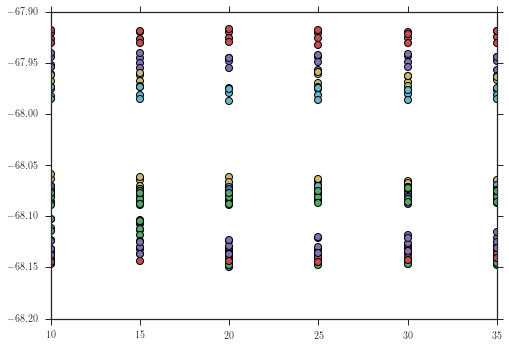

In [8]:
#Now let's look at the dependence on Jastrow factor


bond_sz=df_tstep.groupby(['sz','bond length','tm','ligand'])

for name, group in bond_sz:
  n=len(group)
  print(group)
  plt.errorbar(np.array(group['hybrid']),np.array(group['energy']),np.array(group['error']),
              marker='o',mew=1,linestyle="")

#we see here that threebody energy optimization is always the lowest by quite a bit.
#so let's select out those runs
best_jast=df_tstep[df_tstep["optimizer"]=="energy"]
best_jast=best_jast[best_jast["jastrow"]=="threebody"]
#Now we've controlled the timestep and localization errors as best as possible
#The remaining question is the nodal error

[10, 15, 20, 25, 30, 35]


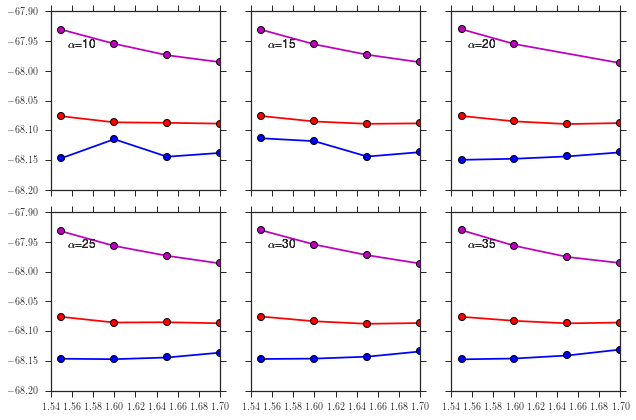

In [9]:
#let's look at the different pictures we get from different nodal surfaces
grouped=best_jast.groupby(["hybrid","sz"])
hybrids=list(set(best_jast['hybrid']))
hybrids.sort()
print(hybrids)
ng=len(hybrids)
fig,axes2d=plt.subplots(int(ng/3),3,figsize=(9,ng),sharey=True,sharex=True)
axes=axes2d.flatten()
colors={1:'b',3:'r',5:'m'}
count=0
for nm, group in grouped:
  i=hybrids.index(nm[0])
  axes[i].errorbar(np.array(group['bond length']),
                         np.array(group['energy']),
                         np.array(group['error']),
                         linestyle="-",marker='o',mew=1,
                         color=colors[nm[1]]
                         )
  axes[i].annotate(r"$\alpha$=%i"%nm[0],xy=(0.1,0.8),xycoords="axes fraction")
plt.tight_layout() 


[1.55, 1.6000000000000001, 1.6499999999999999, 1.7]


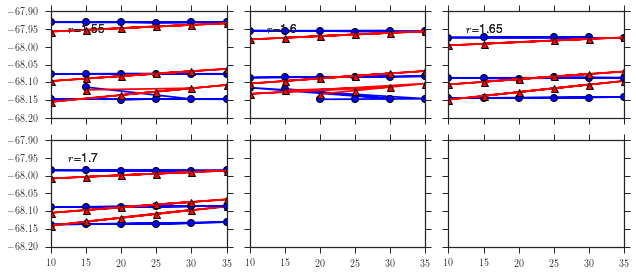

In [10]:
#Or we can check the optimization of the nodal surface for each physical parameter
grouped=best_jast.groupby(["bond length","sz"])
lengths=list(set(best_jast['bond length']))
lengths.sort()
print(lengths)
ng=len(lengths)
fig,axes2d=plt.subplots(int(ng/3+0.7),3,figsize=(9,ng),sharey=True,sharex=True)
axes=axes2d.flatten()
colors={1:'b',3:'r',5:'m'}
count=0
for nm, group in grouped:
  i=lengths.index(nm[0])
  x=np.array(group['hybrid'])
  y=np.array(group['energy'])
  yerr=np.array(group['error'])
  axes[i].errorbar(x,y,yerr,
                         linestyle="-",marker='o',mew=1,
                         color='b'
                         )
  axes[i].plot(x,group['dft_energy'],linestyle='-',marker='^',mew=1,color='r')
  axes[i].annotate(r"$r$=%g"%nm[0],xy=(0.1,0.8),xycoords="axes fraction")
plt.tight_layout() 



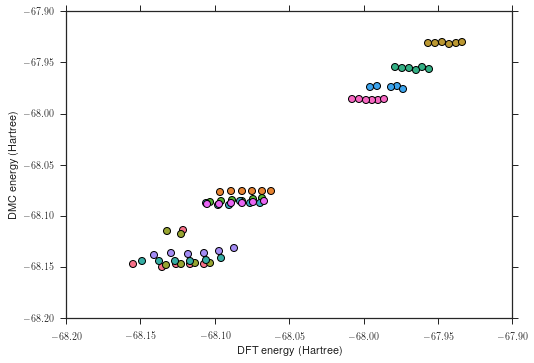

In [11]:
#And we can check the dependence on the reference wave function
grouped=best_jast.groupby(["tm","ligand","bond length","sz"])

sns.set_palette("husl",len(grouped))
for nm, group in grouped:
  plt.errorbar(np.array(group['dft_energy']),
               np.array(group['energy']),
               np.array(group['error']),
               linestyle="", marker='o',mew=1)
plt.xlabel("DFT energy (Hartree)")
plt.ylabel("DMC energy (Hartree)")

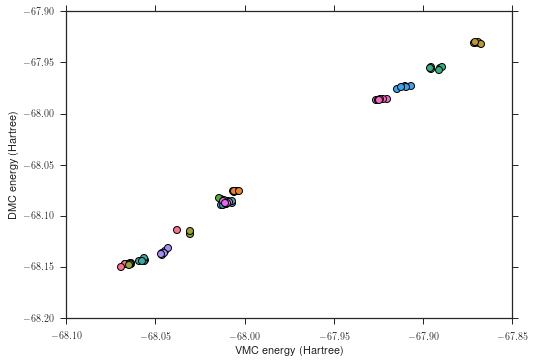

In [12]:
grouped=best_jast.groupby(["tm","ligand","bond length","sz"])
for nm, group in grouped:
  plt.errorbar(np.array(group['vmc_energy']),
               np.array(group['energy']),
               #xerr=np.array(group['vmc_energy_err']),
               np.array(group['error']),
               linestyle="", marker='o',mew=1)
plt.xlabel("VMC energy (Hartree)")
plt.ylabel("DMC energy (Hartree)")

Here we can estimate the error for different DFT functionals. I'm not sure that we should really believe the alpha=10 and 15 results, since there were some poorly converged points there.

Note that the slope and RMS deviations are what matter here. A shift doesn't say anything of particular value.

We could also cut on different axes. For example, if we group by bond length then we can check the errors in the energies of spin states. On the other hand, we could group by spin states to check the error in the energies of bond lengths.

We are kind of relying on the fact that the DMC energies don't depend strongly on the input functional here. 

10 1.08995379057 6.14056146974 0.998519553804 5.5865259422e-14 0.0187759546329
15 1.11640105392 7.93278285825 0.997975507342 2.66910494936e-13 0.0224984986444
20 1.17337089448 11.8006508541 0.997154026869 2.04024556754e-11 0.0295714749868
25 1.19546046614 13.2956486113 0.995792829739 1.03074991642e-11 0.0347871617688
30 1.24098434734 16.3857874951 0.99526569002 1.85824987093e-11 0.0383226897493
35 1.26936934423 18.3089021782 0.994128226828 5.4430462334e-11 0.0436924880601


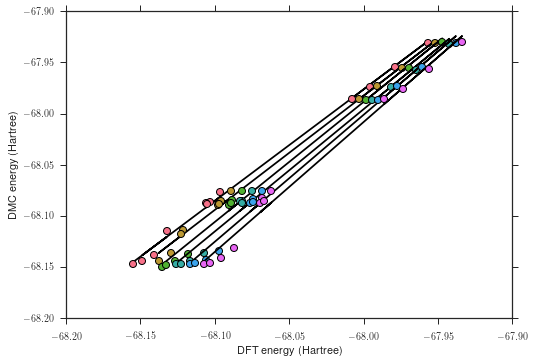

In [13]:
grouped=best_jast.groupby(["hybrid"])
import scipy.stats
sns.set_palette("husl",len(grouped))
for nm, group in grouped:
  x=np.array(group['dft_energy'])
  y=np.array(group['energy'])
  a,b,r,p,err=scipy.stats.linregress(x,y)
  print(nm,a,b,r,p,err)
  plt.plot(x,a*x+b,color='k',linestyle='-')

  plt.errorbar(x,
               y,
               np.array(group['error']),
               linestyle="", marker='o',mew=1,
              label=r'$\alpha=$%i'%nm)
plt.xlabel("DFT energy (Hartree)")
plt.ylabel("DMC energy (Hartree)")

We can also see how good the Jastrow is at reproducing DMC energies. It seems slightly better than DFT, but not a whole lot. Note that the Slater-Jastrow energies don't depend very strongly on the hybrid functional either, which means either the orbitals are very similar or the Jastrow is doing a fairly good job.

1.12908997268 8.70151921659 0.998204563249 1.46487676531e-13 0.0214246644181
1.13385922653 9.02527891644 0.998255296743 1.26939020744e-13 0.0212081988876
1.14352240347 9.68442348087 0.99891994228 2.61369023746e-13 0.0177302117606
1.12631999094 8.51352814292 0.998362358184 9.25037681061e-14 0.0204089270874
1.15076594988 10.1768352168 0.99854354995 5.14842072915e-14 0.0196618599303
1.12997141956 8.76432881085 0.998512996965 5.71127672263e-14 0.0195084674226


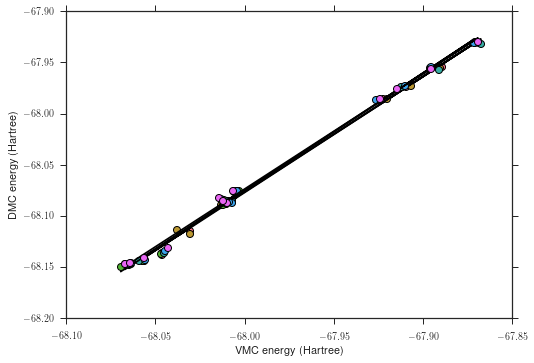

In [14]:
grouped=best_jast.groupby(["hybrid"])
import scipy.stats
sns.set_palette("husl",len(grouped))
for nm, group in grouped:
  x=np.array(group['vmc_energy'])
  y=np.array(group['energy'])
  a,b,r,p,err=scipy.stats.linregress(x,y)
  print(a,b,r,p,err)
  plt.plot(x,a*x+b,color='k',linestyle='-')

  plt.errorbar(x,
               y,
               np.array(group['error']),
               linestyle="", marker='o',mew=1,
               label=r'$\alpha=$%i'%nm)
plt.xlabel("VMC energy (Hartree)")
plt.ylabel("DMC energy (Hartree)")

(10, 1) 1.38318179075 26.1198876096 0.387908805055
(10, 3) 1.28865998883 19.6765142695 0.203376768631
(10, 5) 1.08291895433 5.6612421689 0.0222093131818
(15, 1) 1.85879962466 58.5077512955 0.354262747259
(15, 3) 1.47248599751 32.1843183282 0.120910696713
(15, 5) 1.06614820832 4.5155950562 0.0128713260064
(20, 1) 0.726035653737 -18.6808409058 0.0187778128165
(20, 3) 1.57107381511 38.8860240348 0.15749749911
(20, 5) 1.10374170901 7.06581085982 0.00758086198696
(25, 1) 0.582228195468 -28.4832910657 0.135895134463
(25, 3) 1.29308867926 19.9504058591 0.344615358853
(25, 5) 1.04035195531 2.75129450422 0.0188915657995
(30, 1) 0.655500156452 -23.4977320664 0.111345476793
(30, 3) 1.55272769088 37.6159559668 0.308956905469
(30, 5) 1.06998599777 4.76214492036 0.00866263925237
(35, 1) 0.817850459381 -12.4471069656 0.105255679787
(35, 3) 1.44141463734 30.0292731176 0.380911224089
(35, 5) 1.06748957183 4.58712009039 0.0492892033127


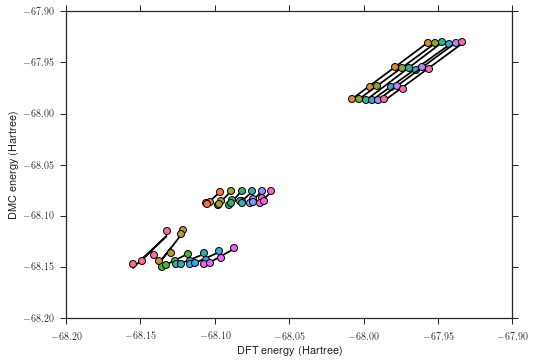

In [15]:
grouped=best_jast.groupby(["hybrid","sz"])
import scipy.stats
sns.set_palette("husl",len(grouped))
for nm, group in grouped:
  x=np.array(group['dft_energy'])
  y=np.array(group['energy'])
  a,b,r,p,err=scipy.stats.linregress(x,y)
  print(nm,a,b,err)
  plt.plot(x,a*x+b,color='k',linestyle='-')

  plt.errorbar(x,
               y,
               np.array(group['error']),
               linestyle="", marker='o',mew=1,
              label=r'$\alpha=$%i'%nm[0])
plt.xlabel("DFT energy (Hartree)")
plt.ylabel("DMC energy (Hartree)")

(10, 1.55) 1.08395894971 5.73327974718 0.0365944099966
(10, 1.6000000000000001) 1.05132735989 3.51364870519 0.0131478365075
(10, 1.6499999999999999) 1.09889696146 6.74832499509 0.0657393096104
(10, 1.7) 1.13212004833 9.00931870417 0.0648185628172
(15, 1.55) 1.07197567732 4.91222306692 0.0170827571551
(15, 1.6000000000000001) 1.08662226104 5.90717863761 0.025530274372
(15, 1.6499999999999999) 1.14784298072 10.0714526051 0.0647774981047
(15, 1.7) 1.17460035215 11.8925141335 0.0799820485184
(20, 1.55) 1.14896010441 10.1404280503 0.0658514958566
(20, 1.6000000000000001) 1.1590068829 10.8236871348 0.0685477108512
(20, 1.6499999999999999) 1.49141642863 33.4619492601 nan
(20, 1.7) 1.22087206713 15.0324997182 0.112242934649
(25, 1.55) 1.15102565558 10.2731135629 0.0655330524799
(25, 1.6000000000000001) 1.18172005479 12.3603589554 0.0787246605115
(25, 1.6499999999999999) 1.22946773365 15.6104733992 0.135234678116
(25, 1.7) 1.28136455473 19.1411044547 0.139860048075
(30, 1.55) 1.19063179922 12.9

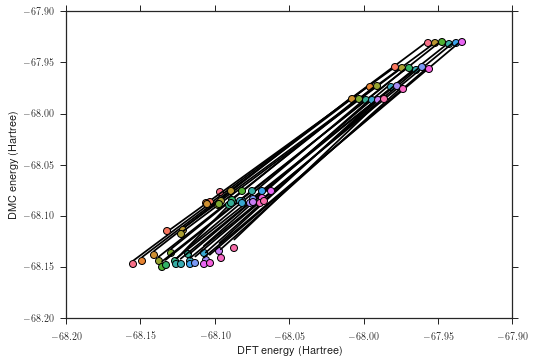

In [16]:
grouped=best_jast.groupby(["hybrid","bond length"])
import scipy.stats
sns.set_palette("husl",len(grouped))
for nm, group in grouped:
  x=np.array(group['dft_energy'])
  y=np.array(group['energy'])
  a,b,r,p,err=scipy.stats.linregress(x,y)
  print(nm,a,b,err)
  plt.plot(x,a*x+b,color='k',linestyle='-')

  plt.errorbar(x,
               y,
               np.array(group['error']),
               linestyle="", marker='o',mew=1,
              label=r'$\alpha=$%i'%nm[0])
plt.xlabel("DFT energy (Hartree)")
plt.ylabel("DMC energy (Hartree)")